## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results,on="Mouse ID", how="outer")
# Display the data table for preview
combined_data.head()


# print(mouse_metadata)
# print(study_results)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
# combined_data['Mouse ID'].count
# number_unique_mice=len(combined_data['Mouse ID'].unique())
# number_unique_mice
number_mice=len(combined_data['Mouse ID'])
number_mice

1893

In [3]:
number_unique_mice=len(combined_data['Mouse ID'].unique())
number_unique_mice

249

In [4]:
number_mice_2=combined_data["Mouse ID"].value_counts()
number_mice_2

g989    13
b559    10
i738    10
y769    10
l471    10
        ..
n482     1
x226     1
t573     1
o848     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_3 = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),'Mouse ID'].unique()
duplicate_mice_3

array(['g989'], dtype=object)

In [13]:
# clean_df= combined_data.drop_duplicates()
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_3)==False]

# cleaned_data=combined_data[combined_data['Mouse ID'].isin(drop_data)==False]
# cleaned_data=drop_data.loc[:,'Mouse ID'].unique()
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
dropped_data=clean_df["Mouse ID"].unique()
dropped_data

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'h246', 'h333', 'h428', 'h531', 'i386',
      

In [16]:
len_dropped_data=len(clean_df["Mouse ID"].unique())
len_dropped_data

248

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 



In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df=pd.DataFrame(drop_data)


In [ ]:
# clean_df

In [ ]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regime_group=clean_df.groupby('Drug Regimen')

regimen_mean=regime_group["Tumor Volume (mm3)"].mean()
# print(regimen_mean)
regimen_median=regime_group["Tumor Volume (mm3)"].median()
# print(regimen_median)
regimen_variance=regime_group["Tumor Volume (mm3)"].var()
# print(regimen_variance)
regimen_std_dev=regime_group["Tumor Volume (mm3)"].std()
# print(regimen_std_dev)
regimen_sem=regime_group["Tumor Volume (mm3)"].sem()
# print(regimen_sem)

summary_statistics_df=pd.DataFrame({
    "Mean": regimen_mean, 
    "Median":regimen_median,
    "Variance": regimen_variance, 
    "Standard Deviation":regimen_std_dev, "SEM": regimen_sem })
summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# # Use DataFrame.plot() in order to create a bar chart of the data
# state_and_inches.plot(kind="bar", figsize=(20,3))
# # Set a title for the chart
# plt.title("Average Rain Per State")
# plt.show()
# plt.tight_layout()
# # Pandas can also plot multiple columns if the DataFrame includes them
# multi_plot = rain_df.plot(kind="bar", figsize=(20,5))
# # PandasPlot.set_xticklabels() can be used to set the tick labels as well
# multi_plot.set_xticklabels(rain_df["State"], rotation=45)
# plt.show()
# plt.tight_layout()

In [21]:
combined_group=combined_data.groupby('Drug Regimen')

In [24]:
# total_mice=regime_group['Mouse ID'].sum()
#total_mice=combined.data['Mouse ID'].sum()
# total_mice=combined_group['Mouse ID'].sum()
# total_mice


# Count how many times each maker appears in our group
count_makers = combined_group['Mouse ID'].count()

count_makers

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

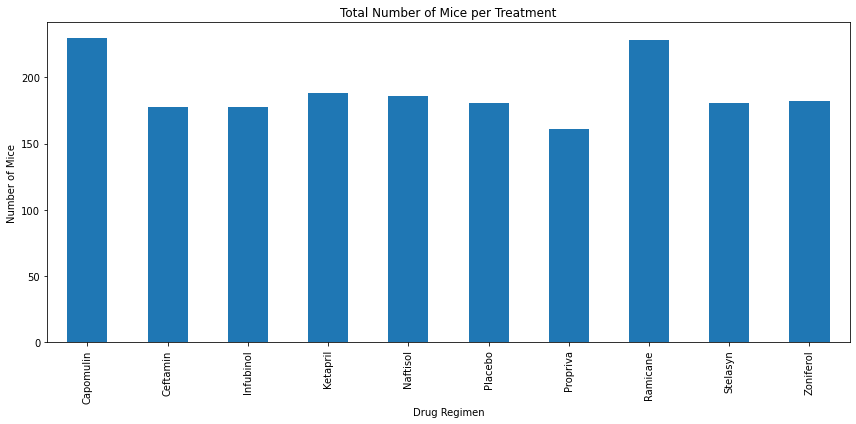

In [33]:
bar_pandas=count_makers.plot(kind="bar", figsize=(12,6))
bar_pandas.set_ylabel("Number of Mice")
plt.title("Total Number of Mice per Treatment")
plt.tight_layout()

In [ ]:
plt.title("")
plt.show()
plt.tight_layout()

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(rain_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, rain_df["State"], rotation="vertical")
# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(rain_df["Inches"])+10)
# Set a Title and labels
plt.title("Average Rain per State")
plt.xlabel("State")
plt.ylabel("Average Amount of Rainfall in Inches")
# Save our graph and show the grap
plt.tight_layout()
plt.savefig("../Images/avg_state_rain.png")
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
